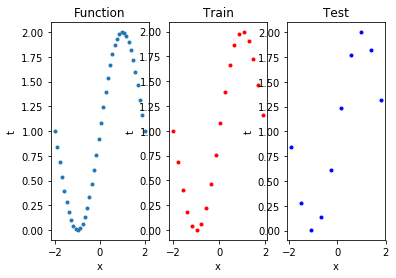

In [606]:

import numpy as np
x = np.linspace(-2,2,40).reshape((40,1))
t = 1 + np.sin( (np.pi/2)*x)


# Split into training, testing, and validation sets
train = x[0::2,:]
test = x[1::4,:]
valid = x[3::4,:]
traintarget = t[0::2,:]
testtarget = t[1::4,:]
validtarget = t[3::4,:]


# Plot the data
plt.subplot(131)
plt.plot(x,t,'.')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Function')

plt.subplot(132)
plt.plot(train,traintarget,'.', c='r')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Train')

plt.subplot(133)
plt.plot(test,testtarget,'.', c='b')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Test')
plt.show()

(2, 2) (3, 1)
Iteration:  0  Error:  17.262202547379236
1
Iteration:  0  Error:  16.968034171097905
2
Iteration:  0  Error:  8.515004773909599
3
Iteration:  0  Error:  6.913221492176433
4
Iteration:  0  Error:  6.105609184259643
5
Iteration:  0  Error:  5.557849706018471
6
Iteration:  0  Error:  5.128201901621102
7
Iteration:  0  Error:  4.767907045264696
8
Iteration:  0  Error:  4.453504384948756
9
Iteration:  0  Error:  4.173796532065719
10
Iteration:  0  Error:  3.9225199103571793
11
Iteration:  0  Error:  3.6961841640082946
12
Iteration:  0  Error:  3.4925315802386523
13
Iteration:  0  Error:  3.3100477914496125
14
Iteration:  0  Error:  3.147558243762774
15
Iteration:  0  Error:  3.0041017832941725
16
Iteration:  0  Error:  2.8787656555505716
17
Iteration:  0  Error:  2.7705589255216427
18
Iteration:  0  Error:  2.678232053004985
19
Iteration:  0  Error:  2.6001172133761887
20
Iteration:  0  Error:  2.5340251600555836
21
Iteration:  0  Error:  2.477266941872055
22
Iteration:  0  E

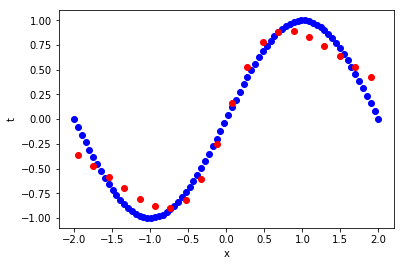

In [623]:
import numpy as np
import matplotlib.pyplot as plt
class mlp:
    def __init__(self,inputs,targets,nhidden):
        self.nin = np.shape(inputs)[1]
        self.nout = np.shape(targets)[1]
        self.ndata = np.shape(inputs)[0]
        self.nhidden = nhidden

        # Initialise network
        self.weights1 = (np.random.rand(self.nin+1,self.nhidden)-0.5)*2/np.sqrt(self.nin)
        self.weights2 = (np.random.rand(self.nhidden+1,self.nout)-0.5)*2/np.sqrt(self.nhidden)
        print(self.weights1.shape, self.weights2.shape)
        
    def earlystopping(self,inputs,targets,valid,validtargets,eta,niterations=10):
        valid = np.concatenate((valid,-np.ones((np.shape(valid)[0],1))),axis=1)
        
        old_val_error1 = 100002
        old_val_error2 = 100001
        new_val_error = 100000
        
        count = 0
        while (((old_val_error1 - new_val_error) > 0.001) or ((old_val_error2 - old_val_error1)>0.001)):
            count+=1
            print(count)
            self.mlptrain(inputs,targets,eta,niterations)
            old_val_error2 = old_val_error1
            old_val_error1 = new_val_error
            validout = self.mlpfwd(valid)
            new_val_error = 0.5*np.sum((validtargets-validout)**2)
            
        print("Stopped", new_val_error,old_val_error1, old_val_error2)
        return new_val_error

    def mlptrain(self,inputs,targets,eta,niterations):
        inputs = np.concatenate((inputs,-np.ones((self.ndata,1))),axis=1)
        change = range(self.ndata)
    
        updatew1 = np.zeros((np.shape(self.weights1)))
        updatew2 = np.zeros((np.shape(self.weights2)))
            
        for n in range(niterations):
    
            self.outputs = self.mlpfwd(inputs)

            error = 0.5*np.sum((self.outputs-targets)**2)
            if (np.mod(n,100)==0):
                print("Iteration: ",n, " Error: ",error) 

            deltao = (self.outputs-targets)/self.ndata
            deltah = self.hidden*(1.0-self.hidden)*(np.dot(deltao,np.transpose(self.weights2)))
            updatew1 = eta*(np.dot(np.transpose(inputs),deltah[:,:-1])) + updatew1
            updatew2 = eta*(np.dot(np.transpose(self.hidden),deltao)) + updatew2
            self.weights1 -= updatew1
            self.weights2 -= updatew2
            
    def mlpfwd(self,inputs):
        self.hidden = np.dot(inputs,self.weights1);
        self.hidden = 1.0/(1.0+np.exp(-self.hidden))
        self.hidden = np.concatenate((self.hidden,-np.ones((np.shape(inputs)[0],1))),axis=1)
        outputs = np.dot(self.hidden,self.weights2);
        return outputs


x = np.linspace(-2,2,80).reshape((80,1))
t = np.sin(0.5*np.pi*x) 

# Split into training, testing, and validation sets
train = x[0::2,:]
test = x[1::4,:]
valid = x[3::4,:]
traintarget = t[0::2,:]
testtarget = t[1::4,:]
validtarget = t[3::4,:]

# Plot the data
plt.plot(x,t,'o', c='b')
plt.xlabel('x')
plt.ylabel('t')

net = mlp(train,traintarget,2)
net.mlptrain(train,traintarget,0.01,1)

net.earlystopping(train,traintarget,valid,validtarget,0.25)

test_ = x[1::4,:]
test = np.concatenate((test,-np.ones((np.shape(test)[0],1))),axis=1)
outputs = net.mlpfwd(test)
plt.plot(test_,outputs,'o', c='r')
plt.show()